In [ ]:
# list of items represented as (value, weight) pairs
itmlst = [(9, 3), (6, 2), (10, 5), (14, 7), (20, 8)]
W = 10

def getvalueoverweight (tp):
  return tp[0] / tp[1]

# the output should be an array indicating the weights for
# each item to take
def fractionalKnapsack (itmlst, W):
  lst = []
  for i in range (len (itmlst)):
    elem = (itmlst[i][0], itmlst[i][1], i)
    lst.append (elem)
  # lst elements are of the form (value, weight, index)

  lst.sort (key = getvalueoverweight, reverse = True)
  print (lst)

  rem = W
  out = [0] * len (lst)
  totalval = 0

  for elem in lst:
    if rem > 0:
      t = min (elem[1], rem)
      idx = elem[2]
      out[idx] += t
      rem -= t

      totalval += elem[0] * t / elem[1]

  print (totalval)
  return out

ans = fractionalKnapsack (itmlst, 10)
print (ans)   # [3, 2, 0, 0, 5]

itmlst2 = [(50, 10), (80, 30), (100, 50), (250, 70)]
print (fractionalKnapsack (itmlst2, 100))

[(9, 3, 0), (6, 2, 1), (20, 8, 4), (10, 5, 2), (14, 7, 3)]
27.5
[3, 2, 0, 0, 5]
[(50, 10, 0), (250, 70, 3), (80, 30, 1), (100, 50, 2)]
353.3333333333333
[10, 20, 0, 70]


In [ ]:
# We talk about brute-force, which is easy to understand
# but how do we actually implement it?

lst = [1, 2, 3]

# generate all possible subsets of the input
def subsets (lst, i = 0, take = []):
  if i == len (lst):    # Base Case: all items already checked
    print (take)
    return
  subsets (lst, i + 1, take)      # do not add index i to the subset
  subsets (lst, i + 1, take + [lst[i]])   # add index i to the subset


subsets (lst)
# print all of [], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]

[]
[3]
[2]
[2, 3]
[1]
[1, 3]
[1, 2]
[1, 2, 3]


In [ ]:
def knapsack01bf (itmlst, W, i = 0):
  if i == len (itmlst):
    return 0
  leave = knapsack01bf (itmlst, W, i + 1)
  ans = leave
  if itmlst[i][1] <= W:
    bring = knapsack01bf (itmlst, W - itmlst[i][1], i + 1) + itmlst[i][0]
    ans = max (leave, bring)
  return ans

itmlst = [(9, 3), (6, 2), (10, 5), (14, 7), (20, 8)]
ans = knapsack01bf (itmlst, 10)
print (ans)   # [3, 2, 0, 0, 5]

itmlst2 = [(50, 10), (80, 30), (100, 50), (250, 70)]
print (knapsack01bf (itmlst2, 100))


26
330


Problem: How do we find the $n$-th Fibonacci number

$F(n) = \begin{cases}
0, & n = 0\\
1, & n = 1\\
F(n - 1) + F(n - 2), & n \geq 2
\end{cases}$

In [10]:
def fibonaccirec (n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fibonaccirec (n - 1) + fibonaccirec (n - 2)

print (fibonaccirec (0))    # 0
print (fibonaccirec (1))    # 1
print (fibonaccirec (2))    # 1
print (fibonaccirec (5))    # 5
print (fibonaccirec (7))    # 13
print (fibonaccirec (11))   # 89
#print (fibonaccirec (100))   # too slow


0
1
1
5
13
89


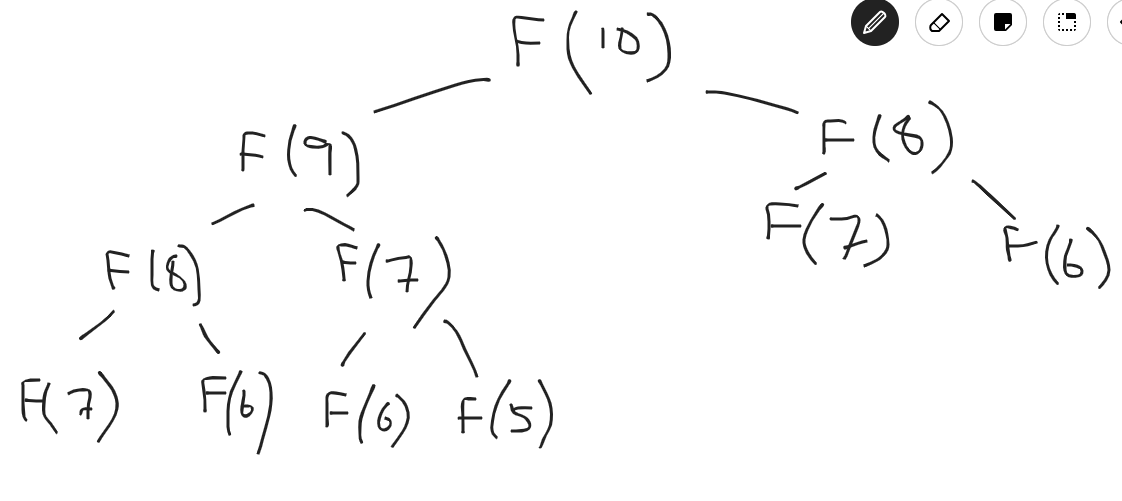

This implementation is very slow. We can see that we keep recalculating $F(i)$ for the same value of $i$ many times.

We can improve this by somehow storing the answers we already calculated, so that we do not have to calculate them again.

This idea of storing values to refer to in place of recursion is known as **Dynamic Programming**, and there are two main variants:

*  Top-Down (Recursive, Memoization)
*  Bottom-Up (Iterative)

In [14]:
# store the values that we already calculated
memo = [False] * 1000000

def fibonaccidpmemo (n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    if memo[n] == False:
      ans = fibonaccidpmemo (n - 1) + fibonaccidpmemo (n - 2)
      memo[n] = ans
      return ans
    else:
      return memo[n]

print (fibonaccidpmemo (0))    # 0
print (fibonaccidpmemo (1))    # 1
print (fibonaccidpmemo (2))    # 1
print (fibonaccidpmemo (5))    # 5
print (fibonaccidpmemo (7))    # 13
print (fibonaccidpmemo (11))   # 89
print (fibonaccidpmemo (100))  # 354224848179261915075
print (fibonaccidpmemo (1000))

# Runtime improves to Theta (n), because the recursion only continues
# along the left path, covering all values from n down to 1,
# so every right branch should already have the answers stored

0
1
1
5
13
89
354224848179261915075
43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875


This is known as recursive DP or top-down DP, and the idea of using an array to store the answers that we already calculated so we can refer to it is known as memoization

In [17]:
def fibonaccidpiterative (n):
  dp = [0] * (n + 1)
  dp[0] = 0
  if n > 0:
    dp[1] = 1
  for i in range (2, n + 1):
    dp[i] = dp[i - 1] + dp[i - 2]
  return dp[n]

print (fibonaccidpiterative (0))    # 0
print (fibonaccidpiterative (1))    # 1
print (fibonaccidpiterative (2))    # 1
print (fibonaccidpiterative (5))    # 5
print (fibonaccidpiterative (7))    # 13
print (fibonaccidpiterative (11))   # 89
print (fibonaccidpiterative (100))  # 354224848179261915075
print (fibonaccidpiterative (1000))

# Runtime is also Theta (n)
# If we anticipate performing this many times, we can improve it
# further by pre-calculating all the values once in Theta (n)
# time, and then each function call can return the answer in O(1) time

0
1
1
5
13
89
354224848179261915075
43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875


In [19]:
MAXVAL = 10000
dp = [0] * (MAXVAL + 1)
dp[0] = 0
dp[1] = 1
for i in range (2, MAXVAL + 1):
  dp[i] = dp[i - 1] + dp[i - 2]

def fibonaccidpiterative2 (n):
  return dp[n]

print (fibonaccidpiterative2 (0))    # 0
print (fibonaccidpiterative2 (1))    # 1
print (fibonaccidpiterative2 (2))    # 1
print (fibonaccidpiterative2 (5))    # 5
print (fibonaccidpiterative2 (7))    # 13
print (fibonaccidpiterative2 (11))   # 89
print (fibonaccidpiterative2 (100))  # 354224848179261915075
print (fibonaccidpiterative2 (1000))

0
1
1
5
13
89
354224848179261915075
43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875


In [27]:
def knapsack01dp (itmlst, W):
  # two parameters change, which are the remaining weight
  # and the current item, so dp needs to be 2-dimensional
  dp = []
  # prepare a 2D array with N+1 rows and W+1 columns
  # where N is the number of items
  for _ in range (len (itmlst) + 1):
    row = [0] * (W + 1)
    dp.append (row)

  # dp[r][c] gives us the optimal value when considering the
  # first r items and a total allowed weight of c

  for r in range (1, len (itmlst) + 1):
    for c in range (1, W + 1):
      # Consider the last item (from the first r items), where we can
      # choose to either leave this item or bring this item

      dp[r][c] = dp[r - 1][c]   # if we leave the last item

      itmval = itmlst[r - 1][0]   # value of last item
      itmwgt = itmlst[r - 1][1]   # weight of last item
      if itmwgt <= c:             # if the last item can be taken
        bringval = itmval + dp[r - 1][c - itmwgt]
        dp[r][c] = max (dp[r][c], bringval)

  for row in dp:
    print (row)
  return dp[-1][-1]

itmlst = [(9, 3), (6, 2), (10, 5), (14, 7), (20, 8)]
print (knapsack01dp (itmlst, 10))

# Runtime: Theta (nW)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9]
[0, 0, 6, 9, 9, 15, 15, 15, 15, 15, 15]
[0, 0, 6, 9, 9, 15, 15, 16, 19, 19, 25]
[0, 0, 6, 9, 9, 15, 15, 16, 19, 20, 25]
[0, 0, 6, 9, 9, 15, 15, 16, 20, 20, 26]
26
